In [0]:
# Import the relevant modules
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
# Load the data
data = load_breast_cancer()

In [3]:
# Check data properties
print("Type:", type(data))

Type: <class 'sklearn.utils.Bunch'>


In [4]:
print("Keys:", data.keys()) # Shows the keys of the data
print("Shape:", data.data.shape) # Check the shape of X
print("Targets:", data.target.shape) # Check the shape of Y
print("Feature Names:", data.feature_names) # Print the input feature names
print("Targets Names:", data.target_names)

Keys: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Shape: (569, 30)
Targets: (569,)
Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Targets Names: ['malignant' 'benign']


In [0]:
# We split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.33)
N, D = X_train.shape

In [0]:
# We scale the data
# StandardScaler is used for normalizing the data
# This is to prevent inputs from having very different ranges

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [0]:
# We build the model
# Sigmoid to make sure the output is 0/1 

"""
Motivation - numerical instability.
Exponential numbers tend to be very large
In the sigmoid, the operation is exponential, which is unstable
The log term in Binary Cross-Entropy is unstable, because of similar reasons
Because the BCE has a log, it cancels our the exponential.
For both Sigmoid and BCE, these can be combined, and express the loss in terms of the activation (aka logit)
The logit is the input into the logistic/sigmoid function.
"""

model = nn.Linear(D, 1)

In [0]:
# Loss and optimizer

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [0]:
# We convert the data into Torch Tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))

# Targets are reshaped to be 2D arrays of shape Nx1
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [11]:
# Train the model
number_epochs = 2000
train_losses = np.zeros(number_epochs)
test_losses = np.zeros(number_epochs)

for iteration in range(number_epochs):

    # We train the model
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    # We are also interested in the test/validation loss, to make sure we are not overtiffing
    outputs_test = model(X_test)
    loss_test = criterion(outputs_test, y_test)

    # We save the losses
    train_losses[iteration] = loss.item()
    test_losses[iteration] = loss_test.item()

    if (iteration+1) % 50 == 0:
        print("Epoch: {}/{}, Train Loss: {}, Test Loss: {}".format(iteration+1, number_epochs, loss.item(), loss_test.item()))

Epoch: 50/2000, Train Loss: 0.542561411857605, Test Loss: 0.5740674734115601
Epoch: 100/2000, Train Loss: 0.3913623094558716, Test Loss: 0.4023183584213257
Epoch: 150/2000, Train Loss: 0.31181907653808594, Test Loss: 0.3171365559101105
Epoch: 200/2000, Train Loss: 0.2626412510871887, Test Loss: 0.2665656805038452
Epoch: 250/2000, Train Loss: 0.22915086150169373, Test Loss: 0.23278281092643738
Epoch: 300/2000, Train Loss: 0.2049051970243454, Test Loss: 0.20850174129009247
Epoch: 350/2000, Train Loss: 0.18658024072647095, Test Loss: 0.19017094373703003
Epoch: 400/2000, Train Loss: 0.17226728796958923, Test Loss: 0.17583324015140533
Epoch: 450/2000, Train Loss: 0.16078901290893555, Test Loss: 0.1643122136592865
Epoch: 500/2000, Train Loss: 0.1513819396495819, Test Loss: 0.15485462546348572
Epoch: 550/2000, Train Loss: 0.1435309499502182, Test Loss: 0.14695453643798828
Epoch: 600/2000, Train Loss: 0.13687683641910553, Test Loss: 0.14025893807411194
Epoch: 650/2000, Train Loss: 0.1311620622

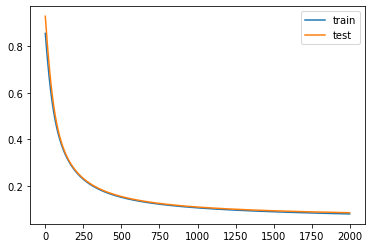

In [12]:
# Plot the train and test losses
plt.plot(train_losses, label='train')
plt.plot(test_losses, label='test')
plt.legend()
plt.show()

In [13]:
# Get the accuracy
# Sigmoid always outputs a number between 0 and 1 and this is a probability
# For logits, the predictions are positive or negative (sides of hyperplane)
with torch.no_grad():
    p_train = model(X_train) # Calculate the prediction
    p_train = (p_train.numpy()> 0) # convert tensors to np, and round them
    train_accuracy = np.mean(y_train.numpy() == p_train) # point-wise comparison and take the mean

    p_test = model(X_test)
    p_test = (p_test.numpy() > 0)
    test_accuracy = np.mean(y_test.numpy() == p_test)

print('Train Accuracy: {}, Test Accuracy: {}'.format(train_accuracy, test_accuracy))

Train Accuracy: 0.9868766404199475, Test Accuracy: 0.9574468085106383
